In [52]:
import pandas as pd
import numpy as np
from astropy.io import fits

from astropy import units as u

import matplotlib.pyplot as plt
import matplotlib.colors as colors
color_dict = {'orange': '#ffab40', 'blue': '#4285f4ff', 'purple': '#a64d79', 'turchese': '#0097a7', 'green': '#38761d',
              'grey': '#78909c', 'palermopink': '#ffbeda', 'otherblue': '#0f9ed5'}
from matplotlib.colors import LogNorm
from matplotlib.patches import Polygon
from matplotlib import cm, rc, gridspec
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.axes as maxes
from matplotlib.ticker import AutoMinorLocator
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

In [2]:
# VIS
vis_df = pd.read_csv('Euclid_VIS.vis.dat', sep = ' ', header = None).rename(columns={0: 'Wave', 1: 'Throughput'})
vis_df['Wave'] = vis_df['Wave']*u.AA.to('micron')
# NISP
YE_df = pd.DataFrame(np.array(fits.getdata('NISP-PHOTO-PASSBANDS-V1-Y_throughput.fits')).byteswap().newbyteorder()).rename(columns={'WAVE': 'Wave', 'T_TOTAL': 'Throughput'})
YE_df['Wave'] = YE_df['Wave']*u.nm.to('micron')
HE_df = pd.DataFrame(np.array(fits.getdata('NISP-PHOTO-PASSBANDS-V1-H_throughput.fits')).byteswap().newbyteorder()).rename(columns={'WAVE': 'Wave', 'T_TOTAL': 'Throughput'})
HE_df['Wave'] = HE_df['Wave']*u.nm.to('micron')
JE_df = pd.DataFrame(np.array(fits.getdata('NISP-PHOTO-PASSBANDS-V1-J_throughput.fits')).byteswap().newbyteorder()).rename(columns={'WAVE': 'Wave', 'T_TOTAL': 'Throughput'})
JE_df['Wave'] = JE_df['Wave']*u.nm.to('micron')

In [3]:
#CFIS_u
u_df = pd.read_csv('U.MP9302.filt', header = None).rename(columns={0: 'Wave', 1: 'Throughput'})
u_df['Wave'] = u_df['Wave']*u.AA.to('micron')
#HSC_g
g_df = pd.read_csv('Subaru_HSC.g.dat', sep = ' ', header = None).rename(columns={0: 'Wave', 1: 'Throughput'})
g_df['Wave'] = g_df['Wave']*u.AA.to('micron')
#CFIS_r
r_df = pd.read_csv('R.MP9602.filt', header = None).rename(columns={0: 'Wave', 1: 'Throughput'})
r_df['Wave'] = r_df['Wave']*u.AA.to('micron')
#PAN STARRS i
i_df = pd.read_csv('PAN-STARRS_PS1.i.dat', sep = ' ', header = None).rename(columns={0: 'Wave', 1: 'Throughput'})
i_df['Wave'] = i_df['Wave']*u.AA.to('micron')
#i_df['Throughput'] *= 0.6
#HSC_z
z_df = pd.read_csv('Subaru_HSC.z.dat', sep = ' ', header = None).rename(columns={0: 'Wave', 1: 'Throughput'})
z_df['Wave'] = z_df['Wave']*u.AA.to('micron')

In [4]:
# IRAC1
CH1_df = pd.read_csv('Spitzer_IRAC.I1.dat', sep = ' ', header = None).rename(columns={0: 'Wave', 1: 'Throughput'})
CH1_df['Wave'] = CH1_df['Wave']*u.AA.to('micron')
# IRAC2
CH2_df = pd.read_csv('Spitzer_IRAC.I2.dat', sep = ' ', header = None).rename(columns={0: 'Wave', 1: 'Throughput'})
CH2_df['Wave'] = CH2_df['Wave']*u.AA.to('micron')

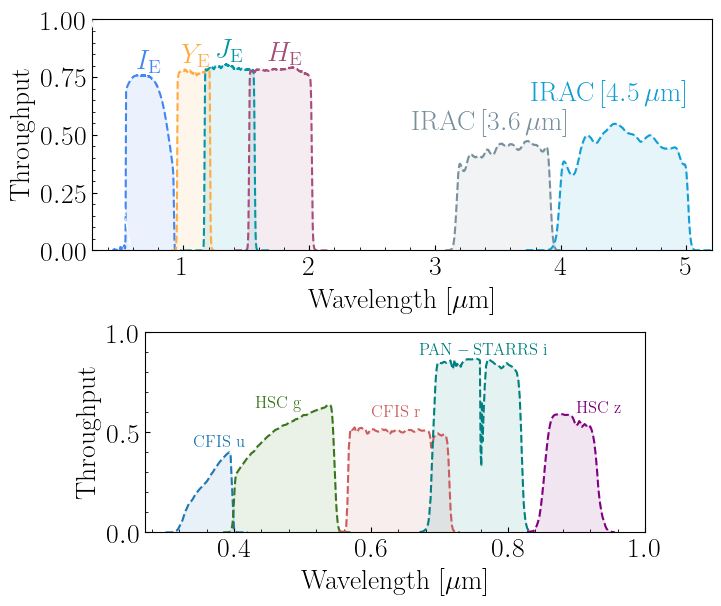

In [94]:
fig = plt.figure(figsize=(8,3))
ax = plt.subplot(111)

# Euclid
list_dfs = [vis_df, YE_df, JE_df, HE_df]
list_text = [r'$I_{\rm E}$', r'$Y_{\rm E}$', r'$J_{\rm E}$', r'$H_{\rm E}$']
list_colors = [color_dict['blue'], color_dict['orange'], color_dict['turchese'], color_dict['purple']]
for df, color, text in zip(list_dfs, list_colors, list_text):
    ax.plot(df['Wave'], df['Throughput'], linestyle = '--', marker = None, color = color)
    ax.fill_between(df['Wave'], 0, df['Throughput'], alpha = 0.1, color = color)
    ax.text(np.mean(df[df['Throughput'] > 0.2]['Wave'])-0.1, np.max(df['Throughput'])+0.03, text, color = color, size = 20)

# IRAC
list_dfs = [CH1_df, CH2_df]
list_text = [r'${\rm IRAC}\,[3.6\,\mu{\rm m}]$', r'${\rm IRAC}\,[4.5\,\mu{\rm m}]$']
list_colors = [color_dict['grey'], color_dict['otherblue']]
shift = 0.
for df, color, text in zip(list_dfs, list_colors, list_text):
    ax.plot(df['Wave'], df['Throughput'], linestyle = '--', marker = None, color = color)
    ax.fill_between(df['Wave'], 0, df['Throughput'], alpha = 0.1, color = color)
    ax.text(np.mean(df[df['Throughput'] > 0.2]['Wave'])-0.7, np.max(df['Throughput'])+0.05+shift, text, color = color, size = 20)
    shift += 0.05

ax.set_ylim(0, 1), ax.set_xlim(0.27, 5.2)
ax.set_xlabel(r'${\rm Wavelength}$ $[\mu \mathrm{m}]$', size = 20)
ax.set_ylabel(r'${\rm Throughput}$', size = 20)
ax.tick_params(axis='both', which='both', direction = 'in', labelsize = 20)
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))

#axins = zoomed_inset_axes(ax, 0.5, loc = 2)
#axins = inset_axes(ax, 5, 2, loc=2, bbox_to_anchor=(0.115, -0.12), bbox_transform=ax.figure.transFigure) # no zoom
axins = inset_axes(ax, 5, 2, loc=2, bbox_to_anchor=(0.183, -0.14), bbox_transform=ax.figure.transFigure) # no zoom

# LSST & co.
list_dfs = [u_df, g_df, r_df, i_df, z_df]
list_text = [r'${\rm CFIS\,\,u}$', r'${\rm HSC\,\,g}$', r'${\rm CFIS\,\,r}$', r'${\rm PAN-STARRS\,\,i}$', r'${\rm HSC\,\,z}$']
list_colors = ['tab:blue', color_dict['green'], 'indianred', 'teal', 'purple']
list_textx = [0.34, 0.43, 0.6, 0.67, 0.9]
list_texty = [0.43, 0.62, 0.58, 0.89, 0.60]
for df, color, text, textx, texty in zip(list_dfs, list_colors, list_text, list_textx, list_texty):
    axins.plot(df['Wave'], df['Throughput'], linestyle = '--', marker = None, color = color)
    axins.fill_between(df['Wave'], 0, df['Throughput'], alpha = 0.1, color = color)
    axins.text(textx, texty, text, color = color, size = 12, weight='bold')

axins.set_xlim(0.27, 1.0), axins.set_ylim(0, 1.0)
mark_inset(ax, axins, loc1=4, loc2=2, fc='w', ec='1.0', zorder = 0, linestyle = '-.')

axins.set_xlabel(r'${\rm Wavelength}$ $[\mu \mathrm{m}]$', size = 20)
axins.set_ylabel(r'${\rm Throughput}$', size = 20)
axins.tick_params(axis='both', which='both', direction = 'in', labelsize = 20)
axins.xaxis.set_minor_locator(AutoMinorLocator(5))
axins.yaxis.set_minor_locator(AutoMinorLocator(5))

fig.savefig('filters.pdf', bbox_inches = 'tight')

---

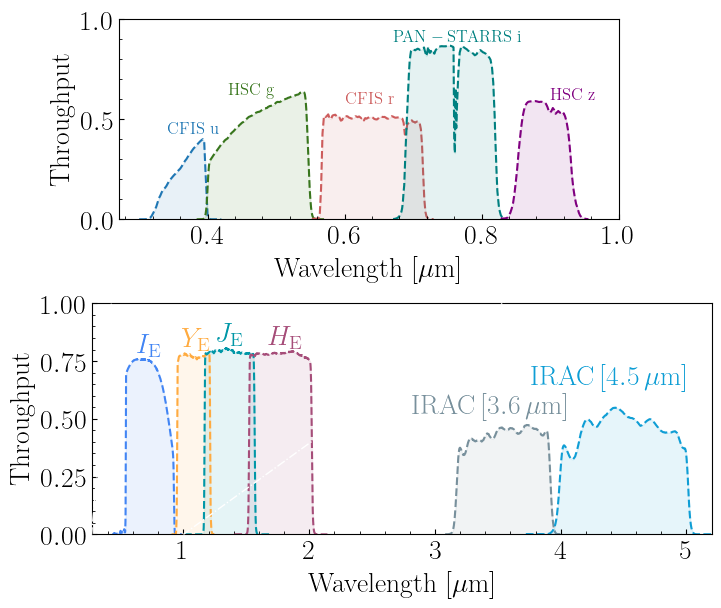

In [81]:
fig = plt.figure(figsize=(8,3))
ax = plt.subplot(111)

# Euclid
list_dfs = [vis_df, YE_df, JE_df, HE_df]
list_text = [r'$I_{\rm E}$', r'$Y_{\rm E}$', r'$J_{\rm E}$', r'$H_{\rm E}$']
list_colors = [color_dict['blue'], color_dict['orange'], color_dict['turchese'], color_dict['purple']]
for df, color, text in zip(list_dfs, list_colors, list_text):
    ax.plot(df['Wave'], df['Throughput'], linestyle = '--', marker = None, color = color)
    ax.fill_between(df['Wave'], 0, df['Throughput'], alpha = 0.1, color = color)
    ax.text(np.mean(df[df['Throughput'] > 0.2]['Wave'])-0.1, np.max(df['Throughput'])+0.03, text, color = color, size = 20)

# IRAC
list_dfs = [CH1_df, CH2_df]
list_text = [r'${\rm IRAC}\,[3.6\,\mu{\rm m}]$', r'${\rm IRAC}\,[4.5\,\mu{\rm m}]$']
list_colors = [color_dict['grey'], color_dict['otherblue']]
shift = 0.
for df, color, text in zip(list_dfs, list_colors, list_text):
    ax.plot(df['Wave'], df['Throughput'], linestyle = '--', marker = None, color = color, zorder = 1)
    ax.fill_between(df['Wave'], 0, df['Throughput'], alpha = 0.1, color = color, zorder = 1)
    ax.text(np.mean(df[df['Throughput'] > 0.2]['Wave'])-0.7, np.max(df['Throughput'])+0.05+shift, text, color = color, size = 20)
    shift += 0.05

ax.set_ylim(0, 1), ax.set_xlim(0.27, 5.2)
ax.set_xlabel(r'${\rm Wavelength}$ $[\mu \mathrm{m}]$', size = 20)
ax.set_ylabel(r'${\rm Throughput}$', size = 20)
ax.tick_params(axis='both', which='both', direction = 'in', labelsize = 20)
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))

#axins = zoomed_inset_axes(ax, 0.5, loc = 2)
axins = inset_axes(ax, 5, 2, loc=2, bbox_to_anchor=(0.15, +1.85), bbox_transform=ax.figure.transFigure) # no zoom

# LSST & co.
list_dfs = [u_df, g_df, r_df, i_df, z_df]
list_text = [r'${\rm CFIS\,\,u}$', r'${\rm HSC\,\,g}$', r'${\rm CFIS\,\,r}$', r'${\rm PAN-STARRS\,\,i}$', r'${\rm HSC\,\,z}$']
list_colors = ['tab:blue', color_dict['green'], 'indianred', 'teal', 'purple']
list_textx = [0.34, 0.43, 0.6, 0.67, 0.9]
list_texty = [0.43, 0.62, 0.58, 0.89, 0.60]
for df, color, text, textx, texty in zip(list_dfs, list_colors, list_text, list_textx, list_texty):
    axins.plot(df['Wave'], df['Throughput'], linestyle = '--', marker = None, color = color, zorder = 1)
    axins.fill_between(df['Wave'], 0, df['Throughput'], alpha = 0.1, color = color)
    axins.text(textx, texty, text, color = color, size = 12, weight='bold')

axins.set_xlim(0.27, 1.0), axins.set_ylim(0, 1.0)
mark_inset(ax, axins, loc1=4, loc2=3, fc='w', ec='1.0', zorder = 0, linestyle = '-.')

axins.set_xlabel(r'${\rm Wavelength}$ $[\mu \mathrm{m}]$', size = 20)
axins.set_ylabel(r'${\rm Throughput}$', size = 20)
axins.tick_params(axis='both', which='both', direction = 'in', labelsize = 20)
axins.xaxis.set_minor_locator(AutoMinorLocator(5))
axins.yaxis.set_minor_locator(AutoMinorLocator(5))

#fig.savefig('filters.pdf', bbox_inches = 'tight')

---